In [1]:
import music21 as m21
import Modules as m
import itertools
import functools
import numpy as np

In [2]:
def _ChordsinScore(score):
    return score.chordify().flat.getElementsByClass('Chord')

def _ChordsAsPitchesInScore(score):
    return [x.pitches for x in _ChordsinScore(score)]

def ChordsAsPitchNamesAndDurationsInScore(score):
    pitchnames = [[x.nameWithOctave for x in c] for c in _ChordsAsPitchesInScore(score)]
    durations = [[x.duration.quarterLength] for x in _ChordsinScore(score)]
    return list(map(lambda pitchnames,durations:[pitchnames]+[durations], pitchnames, durations))


def Indices(searchspace, list_of_checkingelements):
    return [x for x in range(len(searchspace)) if searchspace[x:x+len(list_of_checkingelements)] == list_of_checkingelements]


def _CombineChordList2(list1,list2):
    return list(list1)+list([[ ]])+list(list2)

def CombineChordLists(list_of_chordlist):
    return functools.reduce(_CombineChordList2,list_of_chordlist)

In [3]:
test_scores = list(m21.corpus.chorales.Iterator(1,100))

In [4]:
test_scores_transposed = [m.ScoreAbstraction.TransposeToCIndividual(x) for x in test_scores]
test_Chordlist = CombineChordLists([ChordsAsPitchNamesAndDurationsInScore(x) for x in test_scores_transposed])

In [5]:
len(test_Chordlist)
# test_Chordlist

7932

In [6]:
uniquechords = list(np.unique(test_Chordlist))
len(uniquechords)
# uniquechords
# [x for x in uniquechords if test_Chordlist.count(x)>3]

3197

In [ ]:
np.unique(test_Chordlist, return_inverse = True)[0].shape

In [12]:
markov_result = m.Markov_v2.Markov_model(test_Chordlist,36)

In [13]:
def GeneratedStream(markov_result):
    generated_stream = m21.stream.Stream()
    generated_stream.append([m21.chord.Chord(x[0],quarterLength=x[1][0]) for x in markov_result])
    return generated_stream

In [14]:
generated_stream=GeneratedStream(markov_result)

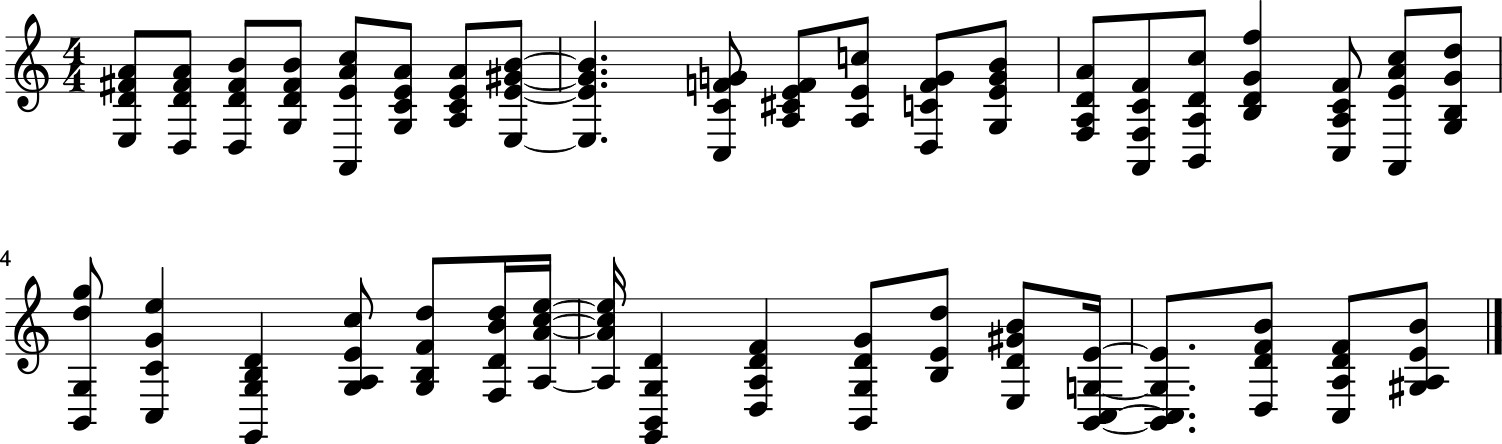

In [15]:
generated_stream.show()

In [16]:
generated_stream.show('midi')